In [10]:
import yfinance as yf
from datetime import datetime, timedelta

In [11]:
today = datetime.now()

one_year_ago = today - timedelta(days=365)

In [77]:
lst = ["AAK.ST", "ACTI.ST", "ABB.ST", "SIVE.ST", "AAK.ST"]

In [78]:
stocks = yf.download(lst, start = "2008-03-14", end = today)

[*********************100%%**********************]  4 of 4 completed


In [80]:
stocks = stocks["Close"]

In [81]:
stocks

Ticker,AAK.ST,ABB.ST,ACTI.ST,SIVE.ST
Date,,,,
2008-03-14,25.000000,148.182678,29.086147,NaN
2008-03-17,25.333332,139.790451,28.358994,NaN
2008-03-18,25.666666,144.825790,28.116610,NaN
2008-03-19,26.583332,144.825790,28.116610,NaN
2008-03-20,25.833332,141.948456,29.086147,NaN
...,...,...,...,...
2024-03-07,227.000000,475.600006,0.536000,3.948
2024-03-08,226.800003,477.299988,0.510000,3.890
2024-03-11,230.000000,477.799988,0.530000,3.802


In [72]:
stocks.isna().value_counts().values

array([2790, 1233])

In [82]:
stocks.columns

Index(['AAK.ST', 'ABB.ST', 'ACTI.ST', 'SIVE.ST'], dtype='object', name='Ticker')

In [83]:
list(set(stocks))

['SIVE.ST', 'ABB.ST', 'ACTI.ST', 'AAK.ST']

In [19]:
# Let's see if this works with SKFOLIO

In [20]:
from sklearn import set_config
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    RandomizedSearchCV,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from scipy.stats import loguniform

from skfolio import RatioMeasure, RiskMeasure
from skfolio.model_selection import (
    CombinatorialPurgedCV,
    WalkForward,
    cross_val_predict,
)
from skfolio.moments import (
    DenoiseCovariance,
    DetoneCovariance,
    EWMu,
    GerberCovariance,
    ShrunkMu,
)
from skfolio.optimization import (
    MeanRisk,
    NestedClustersOptimization,
    ObjectiveFunction,
    RiskBudgeting,
)

from skfolio.pre_selection import SelectKExtremes
from skfolio.preprocessing import prices_to_returns
from skfolio.prior import BlackLitterman, EmpiricalPrior, FactorModel
from skfolio.uncertainty_set import BootstrapMuUncertaintySet

from sklearn.model_selection import train_test_split

from skfolio import RiskMeasure
from skfolio.datasets import load_sp500_dataset
from skfolio.optimization import MeanRisk, ObjectiveFunction
from skfolio.preprocessing import prices_to_returns

In [42]:
X = prices_to_returns(stocks)
X_train, X_test = train_test_split(X, test_size=0.33, shuffle=False)

In [43]:
model = MeanRisk()

In [44]:
model.fit(X_train)

print(model.weights_)

[0.42140856 0.51555159 0.00860594 0.05443391]


In [59]:
model.weights_

array([0.42140856, 0.51555159, 0.00860594, 0.05443391])

In [45]:
sum(model.weights_)

0.9999999999999999

In [57]:
portfolio = model.predict(X_test)

print(portfolio.annualized_sharpe_ratio)
print(portfolio.summary())
print(portfolio.weights_)

1.0114245347746817
Mean                                            0.071%
Annualized Mean                                 17.80%
Variance                                        0.012%
Annualized Variance                              3.10%
Semi-Variance                                  0.0062%
Annualized Semi-Variance                         1.56%
Standard Deviation                               1.11%
Annualized Standard Deviation                   17.60%
Semi-Deviation                                   0.79%
Annualized Semi-Deviation                       12.49%
Mean Absolute Deviation                          0.84%
CVaR at 95%                                      2.46%
EVaR at 95%                                      2.86%
Worst Realization                                3.73%
CDaR at 95%                                     22.06%
MAX Drawdown                                    24.90%
Average Drawdown                                 5.88%
EDaR at 95%                                   

AttributeError: 'Portfolio' object has no attribute 'weights_'

In [68]:
def portfolio_optimator(mod, data):
    
    X = prices_to_returns(data)
    X_train, X_test = train_test_split(X, test_size=0.33, shuffle=False)
    
    model = mod
    
    return model.fit(X_train)

In [114]:
import pandas as pd

In [115]:
s = portfolio_optimator(MeanRisk(), stocks)

In [116]:
va = s.weights_

In [117]:
po = pd.DataFrame(va, columns=['Weight'])
po["ticker"] = stocks.columns


In [118]:
po

,Weight,ticker
0,0.421409,AAK.ST
1,0.515552,ABB.ST
2,0.008606,ACTI.ST
3,0.054434,SIVE.ST


In [ ]:
from sklearn.model_selection import train_test_split

from skfolio.datasets import load_factors_dataset, load_sp500_dataset
from skfolio.optimization import MeanRisk
from skfolio.preprocessing import prices_to_returns
from skfolio.prior import FactorModel

prices = load_sp500_dataset()
factor_prices = load_factors_dataset()

X, y = prices_to_returns(prices, factor_prices)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

model = MeanRisk(prior_estimator=FactorModel())
model.fit(X_train, y_train)
print(model.weights_)

portfolio = model.predict(X_test)
print(portfolio.annualized_sharpe_ratio)

In [119]:
X = prices_to_returns(stocks)
X_train, X_test = train_test_split(X, test_size=0.33, shuffle=False)

dct = [0.5, 0, 0, 0]

model = MeanRisk(
    objective_function=ObjectiveFunction.MAXIMIZE_RATIO,
    risk_measure=RiskMeasure.STANDARD_DEVIATION,
    min_weights=dct)


model.fit(X_train)
print(model.weights_)

portfolio = model.predict(X_test)
print(portfolio.summary())

[7.06488513e-01 1.10213844e-01 6.30407714e-10 1.83297642e-01]
Mean                                              0.047%
Annualized Mean                                   11.77%
Variance                                          0.021%
Annualized Variance                                5.30%
Semi-Variance                                    0.0095%
Annualized Semi-Variance                           2.40%
Standard Deviation                                 1.45%
Annualized Standard Deviation                     23.03%
Semi-Deviation                                     0.98%
Annualized Semi-Deviation                         15.50%
Mean Absolute Deviation                            1.07%
CVaR at 95%                                        3.02%
EVaR at 95%                                        4.21%
Worst Realization                                  6.77%
CDaR at 95%                                       35.23%
MAX Drawdown                                      40.96%
Average Drawdown          

In [161]:
portfolio.value_at_risk

0.021516277122340784

In [121]:
portfolio.annualized_sharpe_ratio

0.510980443101332

In [102]:
portfolio.sharpe_ratio

0.0321899628468023

In [111]:
len(stocks)

4023

In [112]:
portfolio.annualized_mean/255

0.0004615349413380508

In [108]:
round(portfolio.annualized_mean, 2)

0.23

<Axes: xlabel='Date'>

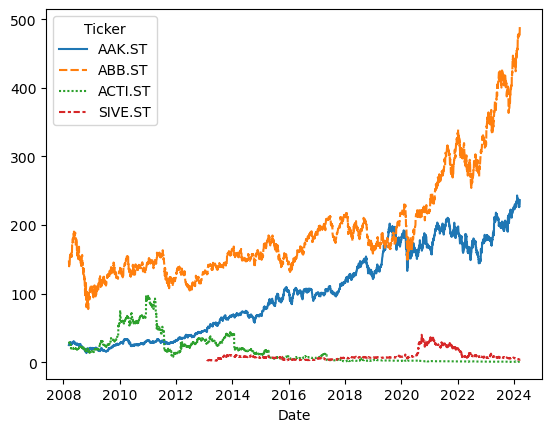

In [105]:
import seaborn as sns

sns.lineplot(stocks)

<Axes: >

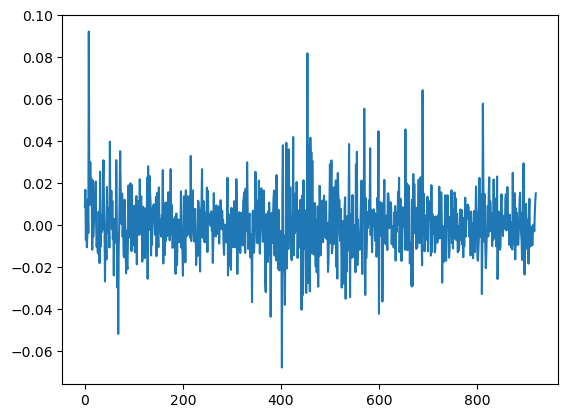

In [124]:
sns.lineplot(portfolio.returns)

In [125]:
portfolio.weights

array([7.06488513e-01, 1.10213844e-01, 6.30407714e-10, 1.83297642e-01])

<Axes: >

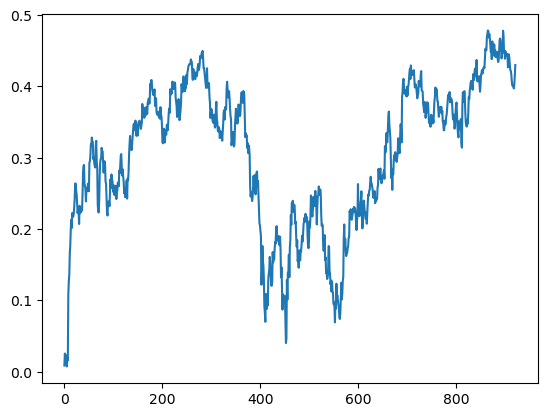

In [128]:
import numpy as np

temp = np.cumsum(portfolio.returns)

sns.lineplot(temp)

In [ ]:
sns.lineplot()

<Axes: >

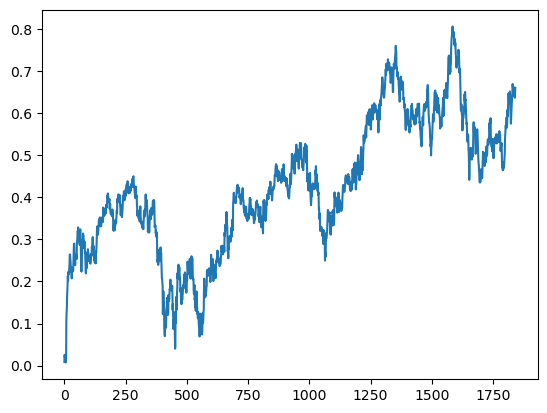

In [139]:
pr = np.cumsum(portfolio.returns)
psr = np.cumsum(np.random.normal(portfolio.mean, portfolio.standard_deviation, len(pr)))
psr = psr + pr[-1]

temp = np.concatenate((pr, psr))

sns.lineplot(temp)

In [141]:
stocks["AAK.ST"]

Date
2008-03-14     25.000000
2008-03-17     25.333332
2008-03-18     25.666666
2008-03-19     26.583332
2008-03-20     25.833332
                 ...    
2024-03-07    227.000000
2024-03-08    226.800003
2024-03-11    230.000000
2024-03-12    236.199997
2024-03-13    236.199997
Name: AAK.ST, Length: 4023, dtype: float64

In [ ]:
# Example values for mean daily return and daily volatility
mean_daily_return = 0.001  # 0.1%
daily_volatility = 0.01   # 1%

# Number of days to simulate
num_days = 250

# Simulate future daily returns
simulated_daily_returns = np.random.normal(mean_daily_return, daily_volatility, num_days)

# Convert simulated daily returns to cumulative returns
simulated_cumulative_returns = np.cumsum(simulated_daily_returns)

# Convert to percentage
simulated_cumulative_returns_percentage = simulated_cumulative_returns * 100

In [129]:
o = [1, 2, 3, 4, 5]
t = [1, 2, 3, 4, 5]

In [131]:
o+t

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [160]:
str(stocks.index[0])[:10]

'2008-03-14'